In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import seaborn as sns

In [3]:
df = pd.read_csv('Life Expectancy Data.csv')
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [4]:
df.columns = [c.replace(' ', '_') for c in df.columns]
df.head()

,Country,Year,Status,Life_expectancy_,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles_,...,Polio,Total_expenditure,Diphtheria_,_HIV/AIDS,GDP,Population,_thinness__1-19_years,_thinness_5-9_years,Income_composition_of_resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [5]:
# drop columns which are not number (at future i will replace names with numbers)
df.drop(['Country', 'Status'], axis=1, inplace=True)

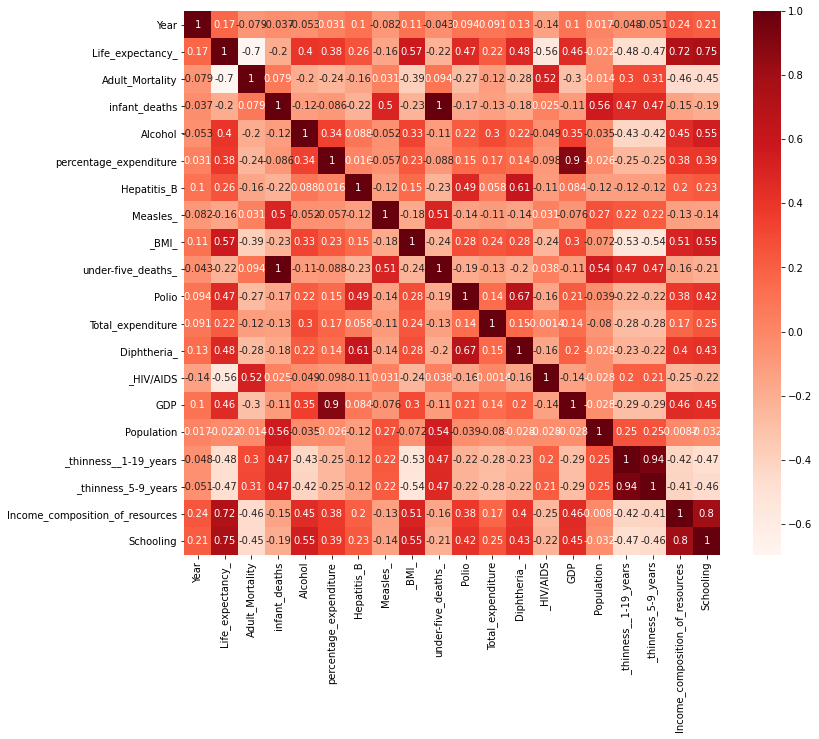

In [6]:
#Using Pearson Correlation for feature selection (using filter method)
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [15]:
#Correlation with output variable
# one way to make sure that linear regression is a good choice for our dataset in compare to non linear regression 
# is calculating correlation coefficient, if number is bigger than 0.7 then it shows linear regression is a good choice
cor_target = abs(cor["Life_expectancy_"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

Life_expectancy_                   1.000000
Adult_Mortality                    0.696359
_BMI_                              0.567694
_HIV/AIDS                          0.556556
Income_composition_of_resources    0.724776
Schooling                          0.751975
Name: Life_expectancy_, dtype: float64

In [8]:
#One of the assumptions of linear regression is that the independent variables need to be uncorrelated with each other.
# If these variables are correlated with each other, then we need to keep only one of them and drop the rest.  
print(df[["Adult_Mortality","_BMI_"]].corr())
print('-----------------------------------------------------')
print(df[["_HIV/AIDS","Adult_Mortality"]].corr())
print('-----------------------------------------------------')
print(df[["Income_composition_of_resources","_HIV/AIDS"]].corr())
print('-----------------------------------------------------')
print(df[["Schooling","Adult_Mortality"]].corr())
print('-----------------------------------------------------')
print(df[["Schooling","_BMI_"]].corr())
print('-----------------------------------------------------')
print(df[["Income_composition_of_resources","_BMI_"]].corr())

                 Adult_Mortality     _BMI_
Adult_Mortality         1.000000 -0.387017
_BMI_                  -0.387017  1.000000
-----------------------------------------------------
                 _HIV/AIDS  Adult_Mortality
_HIV/AIDS         1.000000         0.523821
Adult_Mortality   0.523821         1.000000
-----------------------------------------------------
                                 Income_composition_of_resources  _HIV/AIDS
Income_composition_of_resources                         1.000000  -0.249519
_HIV/AIDS                                              -0.249519   1.000000
-----------------------------------------------------
                 Schooling  Adult_Mortality
Schooling         1.000000        -0.454612
Adult_Mortality  -0.454612         1.000000
-----------------------------------------------------
           Schooling     _BMI_
Schooling   1.000000  0.546961
_BMI_       0.546961  1.000000
-----------------------------------------------------
                

In [9]:
# sns.pairplot(df, height=1.5, aspect=1.5)
# count number of null values in dataset
#df.isnull().values.sum()
# check whether there exicst null values
# df.isnull().values.sum()

In [10]:
# drop null values to clean data
df = df.dropna()

In [11]:
train, test = train_test_split(df, test_size=0.2)

In [12]:
X = train[['Schooling','Income_composition_of_resources', 'Adult_Mortality', '_BMI_']]
y = train['Life_expectancy_']

regr = linear_model.LinearRegression()
regr.fit(X, y)
# The coefficients
print('Coefficients: ', regr.coef_)

Coefficients:  [ 0.96334312 11.30302196 -0.03086274  0.0415621 ]


In [13]:
y_hat= regr.predict(test[['Schooling','Income_composition_of_resources', 'Adult_Mortality', '_BMI_']])
x = test[['Schooling','Income_composition_of_resources', 'Adult_Mortality', '_BMI_']]
y = test['Life_expectancy_']
print("Residual sum of squares: %.2f"% np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))
#The best possible score is 1.0, the lower values are worse.

Residual sum of squares: 19.28
Variance score: 0.74


In [14]:
# End